In [1]:
import numpy as np
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')
import os

In [2]:
import torch

## Create tensor

In [3]:
x = torch.empty(2,3)
y = torch.ones(2,2)
z = torch.zeros(2,2)

In [4]:
print(x)
print(y)
print(z)

tensor([[1.3563e-19, 4.0058e-11, 1.6410e-07],
        [2.5193e-09, 4.1025e-08, 1.3567e-19]])
tensor([[1., 1.],
        [1., 1.]])
tensor([[0., 0.],
        [0., 0.]])


In [5]:
x = torch.ones(2,2, dtype=torch.int)
print(x.dtype)

torch.int32


In [6]:
print(x.size())

torch.Size([2, 2])


In [7]:
x = torch.tensor([2,1.5])
print(x)

tensor([2.0000, 1.5000])


## Reshape

In [8]:
y = torch.rand([2,5])
y

tensor([[0.4359, 0.6883, 0.3158, 0.0831, 0.7101],
        [0.0970, 0.8616, 0.0852, 0.7856, 0.4667]])

In [9]:
y.view([1,10]) # Reshape (flattened)

tensor([[0.4359, 0.6883, 0.3158, 0.0831, 0.7101, 0.0970, 0.8616, 0.0852, 0.7856,
         0.4667]])

## Data

In [10]:
import torch
import torchvision
from torchvision import transforms, datasets

In [11]:
train = datasets.MNIST('', train=True, download=True,transform = transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST('',train=False,download=True, transform = transforms.Compose([transforms.ToTensor()]))



Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw




Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw


Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw
Processing...
Done!


In [12]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test,batch_size=10, shuffle=True)

In [13]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [14]:
x,y = data[0][0], data[1][0]

print(y)

tensor(8)


In [15]:
print(data[0][0].shape)

torch.Size([1, 28, 28])


In [16]:
torch.ones([1,5,5])

tensor([[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]])

In [17]:
torch.ones([2,5,5])

tensor([[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]])

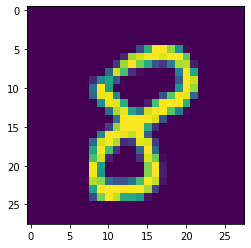

In [18]:
import matplotlib.pyplot as plt

plt.imshow(data[0][0].view(28,28)) # You have to reshape it into 28,28
plt.show()

In [19]:
total = 0
counter_dict = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0}

for data in trainset:
    Xs,ys = data
    
    for y in ys:
        counter_dict[int(y)] += 1
        total +=1
print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [20]:
for i in counter_dict:
    print(f'{i}: {counter_dict[i]/total*100}')

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001


## Building Network

In [2]:
import torch.nn as nn
import torch.nn.functional as F

In [3]:
class Net(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64) # Input must be flattened, 64 neuron for hidden layers
        self.fc2 = nn.Linear(64, 64) # Input must be 64, because fc1 output is 64 
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10) # 10 Classes, so 10 neurons
        
    def forward(self,x):
        x = F.relu(self.fc1(x)) # Activation function is Rectified Linear
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        
        return F.log_softmax(x, dim=1)

        
net = Net()
print(net)


Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [ ]:
X = torch.rand((28,28))
X = X.view(-1,28*28) # Reshape into appropriate shape for modelling

In [ ]:
output = net(X)
output

##  Training Model

In [ ]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr = 0.001)

epochs = 3

for epoch in range(epochs):
    for data in trainset:
        # data is a batch of featuresets and labels
        X,y = data
        
        net.zero_grad()
        output = net(X.view(-1, 28*28))
        loss =  F.nll_loss(output, y) # Use nll_loss because the loss is a scalar not a vector, if the data is one hot vector use RMSE
        loss.backward() # Back Propagation
        optimizer.step() # Adjust the weight
        
    print(loss)

In [ ]:
correct = 0
total = 0 

# Calculate how good is the network is
with torch.no_grad():
    for data in trainset:
        X,y = data
        output = net(X.view(-1, 28*28))
        
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
            
print(f'Accuracy: {round(correct/total,3)}')

In [ ]:
plt.imshow(X[9].view(28,28))
plt.show()

In [ ]:
print(torch.argmax(net(X[9].view(-1,28*28))[0]))

## CONV NN

In [4]:
import os
import cv2
import numpy as np
from tqdm import tqdm

REBUILD_DATA = True